<a href="https://colab.research.google.com/github/MoizAhmed2517/Deep_Learning_Projects/blob/main/Multi_Class_Image_Classification_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-11-19 19:42:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.250.73.208, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   220MB/s    in 2.2s    

2022-11-19 19:42:20 (220 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Dense, Activation, MaxPool2D
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and have {len(filenames)} images in {dirpath}")

There are 2 directories and have 0 images in 10_food_classes_all_data
There are 10 directories and have 0 images in 10_food_classes_all_data/train
There are 0 directories and have 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and have 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and have 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and have 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and have 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and have 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and have 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and have 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and have 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and have 750 images in 10_food_classes_

In [4]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [5]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

class_names[np.where(class_names == 'steak')][0]


'steak'

In [6]:
path =  train_dir + class_names[0]
random.sample(os.listdir(path), 1)

['181852.jpg']

In [7]:
def random_image_plotter(classname):
  path =  train_dir + class_names[np.where(class_names == classname)][0] + "/"
  img = random.sample(os.listdir(path), 1)
  image = mpimg.imread(path + img[0])
  plt.imshow(image)
  plt.title(f"Class Name: {classname} and Shape: {image.shape}")
  plt.axis(False)

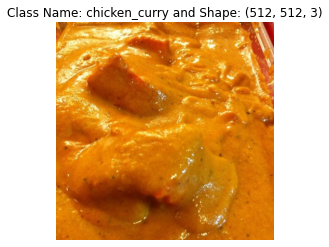

In [8]:
random_image_plotter("chicken_curry")

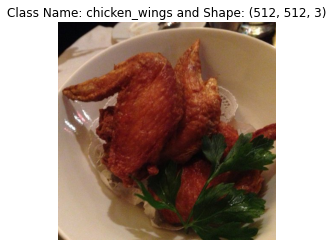

In [9]:
random_image_plotter("chicken_wings")

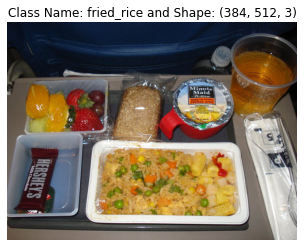

In [10]:
random_image_plotter("fried_rice")

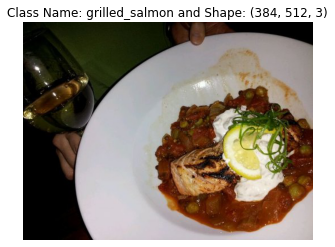

In [11]:
random_image_plotter("grilled_salmon")

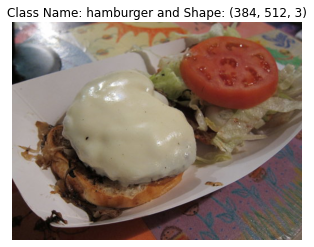

In [12]:
random_image_plotter("hamburger")

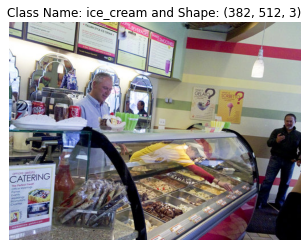

In [13]:
random_image_plotter("ice_cream")

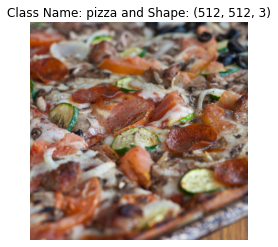

In [14]:
random_image_plotter("pizza")

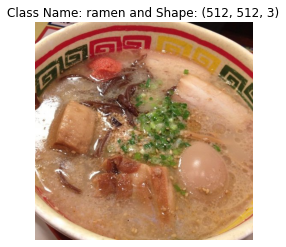

In [15]:
random_image_plotter("ramen")

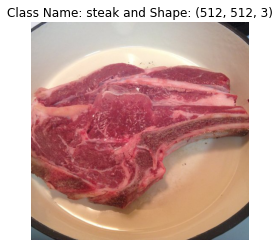

In [16]:
random_image_plotter("steak")

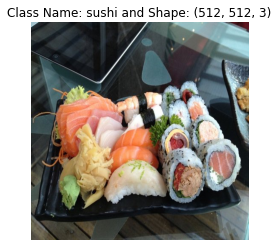

In [17]:
random_image_plotter("sushi")

In [18]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               class_mode="categorical",
                                               target_size=(224, 224),
                                               batch_size=32)
test_data = train_datagen.flow_from_directory(test_dir,
                                               class_mode="categorical",
                                               target_size=(224, 224),
                                               batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [19]:
# Model 1 - Baseline (Tiny VGG)

tf.random.set_seed(42)

model_1 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, strides=1, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 54s 193ms/step - loss: 2.1336 - accuracy: 0.2164 - val_loss: 2.0509 - val_accuracy: 0.2800
Epoch 2/5
235/235 [==============================] - 44s 188ms/step - loss: 1.9082 - accuracy: 0.3385 - val_loss: 1.9280 - val_accuracy: 0.3288
Epoch 3/5
235/235 [==============================] - 48s 203ms/step - loss: 1.5915 - accuracy: 0.4593 - val_loss: 1.9166 - val_accuracy: 0.3328
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 1.0320 - accuracy: 0.6544 - val_loss: 2.2464 - val_accuracy: 0.3072
Epoch 5/5
235/235 [==============================] - 46s 196ms/step - loss: 0.4095 - accuracy: 0.8709 - val_loss: 3.2043 - val_accuracy: 0.2964


In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [47]:
def plot_loss_curves(history):
  loss = history.history['loss']
  accuracy = history.history["accuracy"]

  val_loss = history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]
  
  epochs = range(len(loss))

  plt.figure(figsize=(12, 12))
  plt.subplot(2, 1, 1)
  plt.plot(epochs, accuracy, label="Training Accuracy")
  plt.plot(epochs, val_accuracy, label="Validation Accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure(figsize=(12, 12))
  plt.subplot(2, 1, 2)
  plt.plot(epochs, loss, label="Training Loss")
  plt.plot(epochs, val_loss, label="Validation Accuracy")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend();

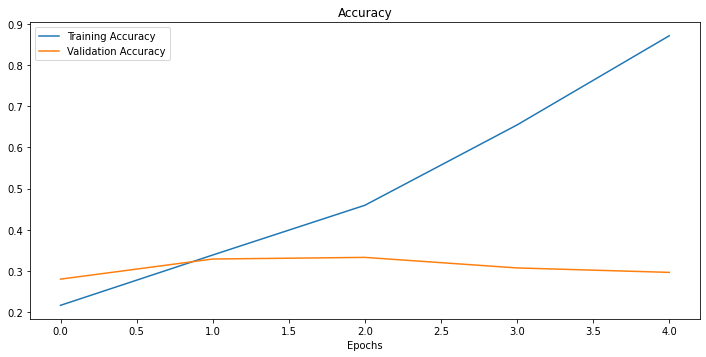

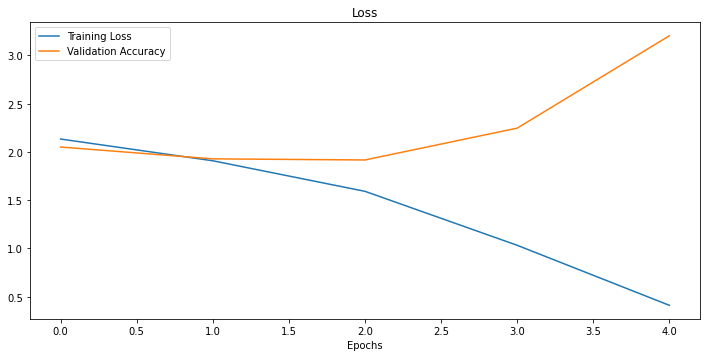

In [48]:
plot_loss_curves(history_1)

**After plotting loss curve it can be observed that our model is overfitting, not generlazing the features that's why during validation it explodes**

In [49]:
# Model 2 - Baseline (Tiny VGG) - Removing layers and reducing overfitting

tf.random.set_seed(42)

model_2 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_2.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 187ms/step - loss: 2.1111 - accuracy: 0.2344 - val_loss: 1.9588 - val_accuracy: 0.3232
Epoch 2/5
235/235 [==============================] - 42s 181ms/step - loss: 1.7867 - accuracy: 0.3889 - val_loss: 1.8633 - val_accuracy: 0.3480
Epoch 3/5
235/235 [==============================] - 42s 180ms/step - loss: 1.4110 - accuracy: 0.5435 - val_loss: 1.8856 - val_accuracy: 0.3524
Epoch 4/5
235/235 [==============================] - 43s 183ms/step - loss: 0.9244 - accuracy: 0.7079 - val_loss: 2.1215 - val_accuracy: 0.3412
Epoch 5/5
235/235 [==============================] - 46s 193ms/step - loss: 0.4958 - accuracy: 0.8619 - val_loss: 2.6290 - val_accuracy: 0.3132


In [50]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

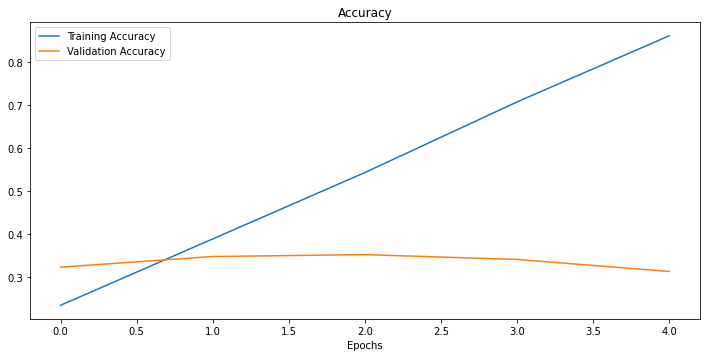

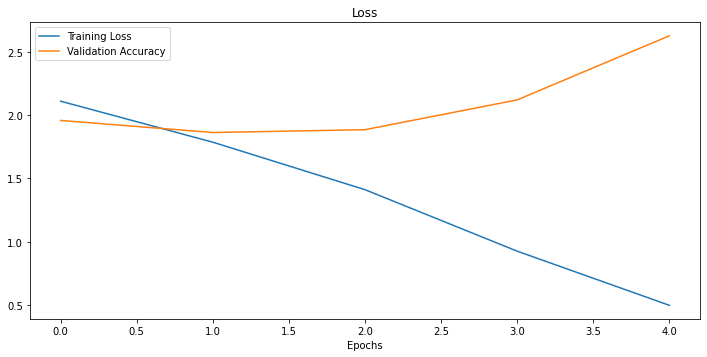

In [51]:
plot_loss_curves(history_2)

**Model 1** and **Model 2** *have almost same accuracy and loss curves are doing exactly somehow same. However we simplify our model but the important thing to note that Conv. Layer just add more complexity and try to learn more features and check summary that the training parameters are also same.*

## Trying data Augmentation

In [55]:
train_datagen_augment = ImageDataGenerator(rescale=1/255.,
                                           zoom_range=0.2,
                                           rotation_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)

train_data_aug = train_datagen_augment.flow_from_directory(train_dir,
                                                           target_size=(224, 224),
                                                           batch_size=32,
                                                           class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [56]:
# Model 3 - Baseline (Tiny VGG) - Removing layers and reducing overfitting and adding data augmentation

model_3 = tf.keras.models.clone_model(model_2)

model_3.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data_aug,
            epochs=5,
            steps_per_epoch=len(train_data_aug),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 107s 452ms/step - loss: 2.1536 - accuracy: 0.2203 - val_loss: 1.9792 - val_accuracy: 0.3016
Epoch 2/5
235/235 [==============================] - 106s 453ms/step - loss: 2.0509 - accuracy: 0.2773 - val_loss: 1.9396 - val_accuracy: 0.3124
Epoch 3/5
235/235 [==============================] - 106s 452ms/step - loss: 2.0193 - accuracy: 0.2844 - val_loss: 1.9083 - val_accuracy: 0.3548
Epoch 4/5
235/235 [==============================] - 105s 448ms/step - loss: 1.9728 - accuracy: 0.3196 - val_loss: 1.8090 - val_accuracy: 0.3644
Epoch 5/5
235/235 [==============================] - 105s 448ms/step - loss: 1.9390 - accuracy: 0.3267 - val_loss: 1.7910 - val_accuracy: 0.3864


In [57]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

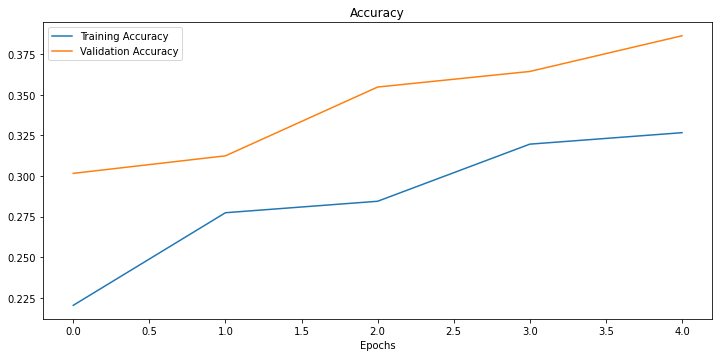

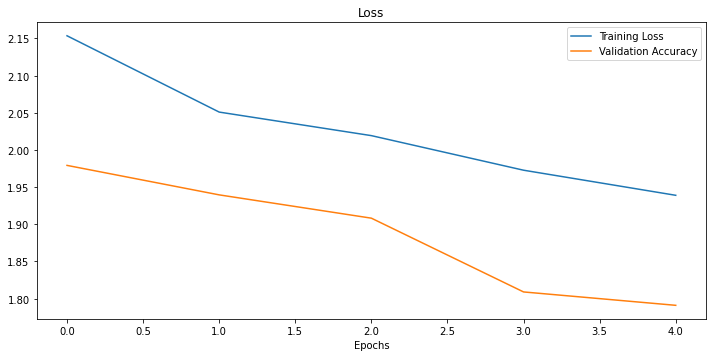

In [58]:
plot_loss_curves(history_3)

**Curves are almost similar the only approach we need to do i.e. to increase the number of epochs.**

In [82]:
def image_loader_pipeline(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  img = tf.expand_dims(img, axis=0)
  return img

def predict_class(filename, model, class_names=class_names):
  img = image_loader_pipeline(filename)
  pred = model.predict(img)
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]
  plt.imshow(mpimg.imread(filename))
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [84]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-11-19 21:29:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.01s   

2022-11-19 21:29:19 (313 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-11-19 21:29:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting 

1/1 [==============================] - 0s 17ms/step


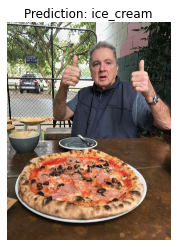

In [85]:
predict_class("03-pizza-dad.jpeg", model_3)

1/1 [==============================] - 0s 26ms/step


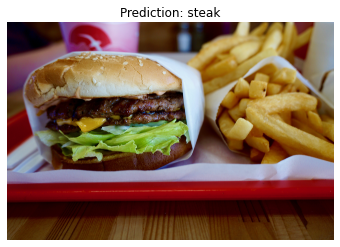

In [86]:
predict_class("03-hamburger.jpeg", model_3)

1/1 [==============================] - 0s 68ms/step


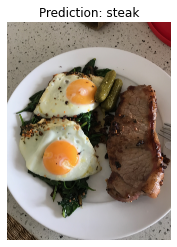

In [87]:
predict_class("03-steak.jpeg", model_3)

1/1 [==============================] - 0s 18ms/step


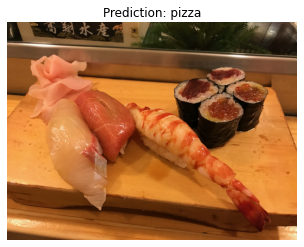

In [88]:
predict_class("03-sushi.jpeg", model_3)

**Model Needs more improvement**. Time to use transfer learning. Out of 4 it only predict one correctly.

## Saving Model For future use

In [89]:
model_3.save("Saved_model_10_Food_Classification")

In [90]:
# Checking if our model is saved correctly

In [91]:
load_model_3 = tf.keras.models.load_model("Saved_model_10_Food_Classification")
load_model_3.evaluate(test_data)

79/79 [==============================] - 14s 171ms/step - loss: 1.7910 - accuracy: 0.3864


[1.7910349369049072, 0.3864000141620636]

In [92]:
model_3.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 1.7910 - accuracy: 0.3864


[1.7910345792770386, 0.3864000141620636]

**Model Saved Correctly!**